In [ ]:
import pandas as pd

In [ ]:
sequentialExecutionTime = pd.read_csv('SequentialTime.csv')
concurrentExecutionTimeVersion1 = pd.read_csv('ConcurrentTime_Version1.csv')
concurrentExecutionTimeVersion2 = pd.read_csv('ConcurrentTime_Version2.csv')

print(sequentialExecutionTime.head())
print('\n\n')
print(concurrentExecutionTimeVersion1.head())
print('\n\n')
print(concurrentExecutionTimeVersion2.head())
print('\n\n')

print(f'Tamanhos da matriz (versão Sequencial): {sequentialExecutionTime.tamanho.value_counts().index.values}')
print(f'Tamanhos da matriz (versão Concorrente): {concurrentExecutionTimeVersion1.tamanho.value_counts().index.values}')
print(f'Tamanhos da matriz (versão Concorrente): {concurrentExecutionTimeVersion2.tamanho.value_counts().index.values}')


   tamanho  tempo
0        4      0
1        4      0
2        4      0
3        4      0
4        4      0



   tamanho  tempo
0        4      3
1        4      1
2        4      1
3        4      1
4        4      3



   tamanho  tempo
0        4      2
1        4      1
2        4      1
3        4      1
4        4      5



Tamanhos da matriz (versão Sequencial): [1024  128  512   64   32   16    8    4 2048  256]
Tamanhos da matriz (versão Concorrente): [1024  128  512   64   32   16    8    4 2048  256]
Tamanhos da matriz (versão Concorrente): [  64 1024  128  512   32   16    8 2048  256    4]


In [ ]:
dimensions = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] 


for dimension in dimensions:
  timeSequentialExecution = sequentialExecutionTime[sequentialExecutionTime.tamanho == dimension]['tempo']
  print(timeSequentialExecution.max())
  print(timeSequentialExecution.min())
  print(timeSequentialExecution.mean())
  print(timeSequentialExecution.std())
  print(f"{dimension} ::: \n")


1
0
0.05
0.22360679774997888
4 ::: 

1
0
0.35
0.4893604849295929
8 ::: 

4
0
1.8
0.9514531821875089
16 ::: 

18
1
3.0
4.8558158293350715
32 ::: 

41
4
8.9
8.711154373922886
64 ::: 

30
27
28.0
0.7254762501100116
128 ::: 

317
260
268.0
12.01753105390533
256 ::: 

2608
2505
2540.95
28.94182004243032
512 ::: 

27339
25699
26052.15
397.2980155473907
1024 ::: 

254302
242863
244456.2
3165.5154498371817
2048 ::: 



In [ ]:
dimensions = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] 


for dimension in dimensions:
  timeConcurrentExecutionVersion1 = concurrentExecutionTimeVersion1[concurrentExecutionTimeVersion1.tamanho == dimension]['tempo']
  print(timeConcurrentExecutionVersion1.max())
  print(timeConcurrentExecutionVersion1.min())
  print(timeConcurrentExecutionVersion1.mean())
  print(timeConcurrentExecutionVersion1.std())
  print(f"{dimension} ::: \n")


7
0
1.95
1.7614288458371996
4 ::: 

14
1
3.55
3.203205631205944
8 ::: 

18
2
8.2
5.176871642217914
16 ::: 

24
5
13.45
4.740364187652563
32 ::: 

109
7
26.5
27.923768408029442
64 ::: 

117
24
47.45
30.327120049986874
128 ::: 

301
109
161.15
60.8019000741883
256 ::: 

945
558
667.15
115.47033111765575
512 ::: 

10585
5097
5518.4
1201.4919409677814
1024 ::: 

52228
49751
51276.4
839.2759034460976
2048 ::: 



In [ ]:
dimensions = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] 


for dimension in dimensions:
  timeConcurrentExecutionVersion2 = concurrentExecutionTimeVersion2[concurrentExecutionTimeVersion2.tamanho == dimension]['tempo']
  print(timeConcurrentExecutionVersion2.max())
  print(timeConcurrentExecutionVersion2.min())
  print(timeConcurrentExecutionVersion2.mean())
  print(timeConcurrentExecutionVersion2.std())
  print(f"{dimension} ::: \n")

5
1
2.0
1.7320508075688772
4 ::: 

10
1
4.6
2.779625116715146
8 ::: 

9
2
4.9
1.7740824166460338
16 ::: 

13
4
8.35
2.7961439613567074
32 ::: 

38
3
17.16
10.617124532251346
64 ::: 

76
11
29.6
22.813661650308063
128 ::: 

187
51
100.35
42.64945856384901
256 ::: 

794
443
516.35
113.67463958249668
512 ::: 

4942
4624
4742.05
98.8419658370184
1024 ::: 

47184
44543
45763.95
785.914316677012
2048 ::: 



In [ ]:
import matplotlib.pyplot as plt   
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})

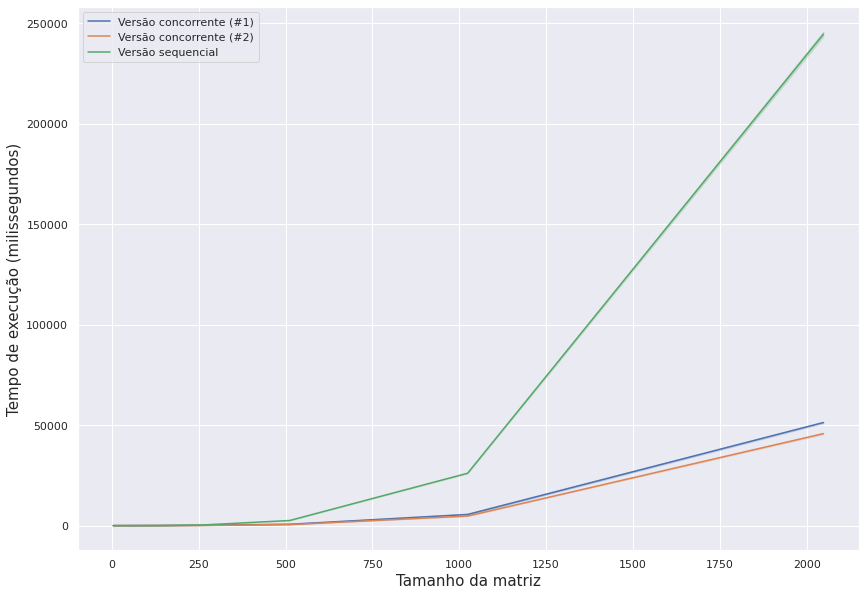

In [ ]:
sns.lineplot(x="tamanho", y="tempo", data=concurrentExecutionTimeVersion1)
sns.lineplot(x="tamanho", y="tempo", data=concurrentExecutionTimeVersion2)
sns.lineplot(x="tamanho", y="tempo", data=sequentialExecutionTime)
plt.xlabel('Tamanho da matriz', fontsize=15)
plt.ylabel('Tempo de execução (milissegundos)', fontsize=15)
plt.legend(['Versão concorrente (#1)','Versão concorrente (#2)','Versão sequencial'])

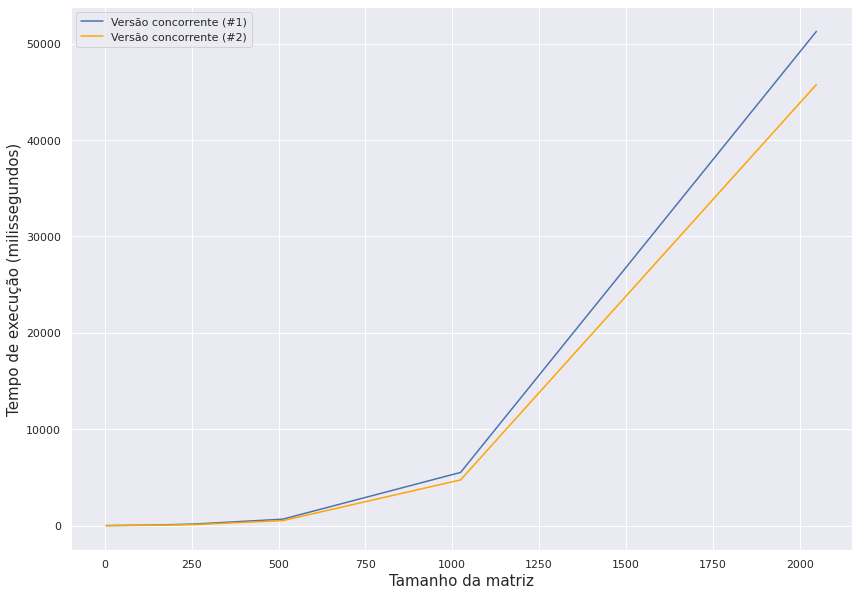

In [ ]:
dimensions = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] 
meansConcurrentExecutionVersion1 = []
meansConcurrentExecutionVersion2 = []

for dimension in dimensions:
  timeConcurrentExecutionVersion1 = concurrentExecutionTimeVersion1[concurrentExecutionTimeVersion1.tamanho == dimension]['tempo']
  meansConcurrentExecutionVersion1.append(timeConcurrentExecutionVersion1.mean())
  timeConcurrentExecutionVersion2 = concurrentExecutionTimeVersion2[concurrentExecutionTimeVersion2.tamanho == dimension]['tempo']
  meansConcurrentExecutionVersion2.append(timeConcurrentExecutionVersion2.mean())



sns.lineplot(x=dimensions, y=meansConcurrentExecutionVersion1)
sns.lineplot(x=dimensions, y=meansConcurrentExecutionVersion2, color='orange' )
plt.xlabel('Tamanho da matriz', fontsize=15)
plt.ylabel('Tempo de execução (milissegundos)', fontsize=15)
plt.legend(['Versão concorrente (#1)', 'Versão concorrente (#2)'])

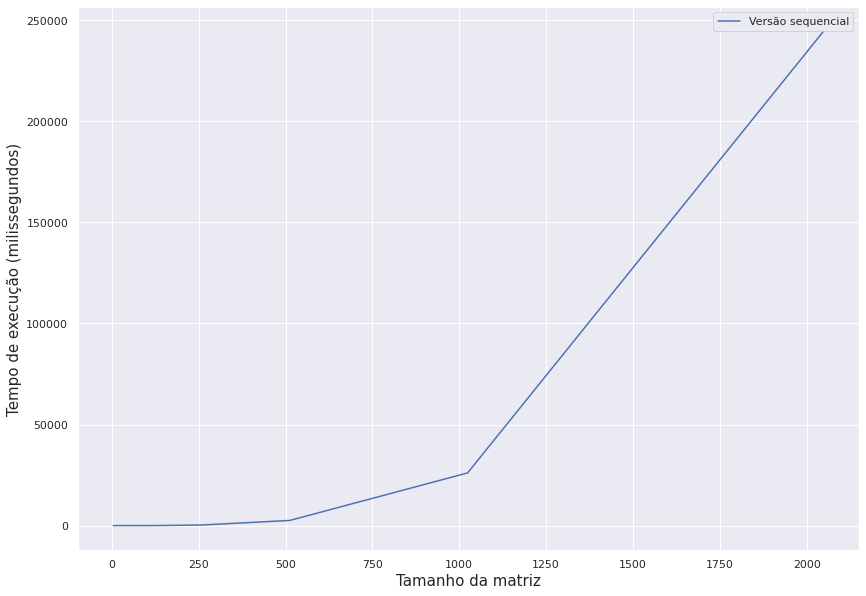

In [ ]:
dimensions = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] 
meansSequentialExecution = []

for dimension in dimensions:
  timeSequentialExecution = sequentialExecutionTime[sequentialExecutionTime.tamanho == dimension]['tempo']
  meansSequentialExecution.append(timeSequentialExecution.mean())


sns.lineplot(x=dimensions, y=meansSequentialExecution)
plt.xlabel('Tamanho da matriz', fontsize=15)
plt.ylabel('Tempo de execução (milissegundos)', fontsize=15)
plt.legend(['Versão sequencial'])